# Welcome to Kijang Emas analysis!

![alt text](https://www.maybank2u.com.my/maybank_gif/personal/investments/images/INV03.01_logo_lg.jpg)

I was found around last week (18th March 2019), our Bank Negara opened public APIs for certain data, it was really cool and I want to help people get around with the data and what actually they can do with the data!

We are going to cover 2 things here,

1. Data Analytics
2. Predictive Modelling (Linear regression, ARIMA, LSTM)

Hell, I know nothing about Kijang Emas.

**Again, do not use this code to buy something on the real world (if got positive return, please donate some to me)**

In [1]:
import requests
from datetime import date

## Data gathering

To get the data is really simple, use this link to get kijang emas data, https://www.bnm.gov.my/kijang-emas-prices

A rest API is available at https://api.bnm.gov.my/portal#tag/Kijang-Emas

Now, I want to get data from january 2020 - march 2021.

https://api.bnm.gov.my/portal#operation/KELatest

In [2]:
# latest https://api.bnm.gov.my/public/kijang-emas
requests.get('https://api.bnm.gov.my/public/kijang-emas',
        headers = {'Accept': 'application/vnd.BNM.API.v1+json'},).json()

{'data': {'effective_date': '2021-03-03',
  'one_oz': {'buying': 7180, 'selling': 7474},
  'half_oz': {'buying': 3590, 'selling': 3808},
  'quarter_oz': {'buying': 1795, 'selling': 1939}},
 'meta': {'last_updated': '2021-03-03 21:40:30', 'total_result': 1}}

In [3]:
# by month year https://api.bnm.gov.my/public/kijang-emas/year/{year}/month/{month}
month= 12
year = 2020
print ('https://api.bnm.gov.my/public/kijang-emas/year/{}/month/{}'.format(year,month))
res=requests.get('https://api.bnm.gov.my/public/kijang-emas/year/{}/month/{}'.format(year,month), 
             headers = {'Accept': 'application/vnd.BNM.API.v1+json'},).json()
res['meta']['total_result']

https://api.bnm.gov.my/public/kijang-emas/year/2020/month/12


22

2020 data

In [4]:
data_2020 = []
for i in range(12):
    res=requests.get('https://api.bnm.gov.my/public/kijang-emas/year/2020/month/%d'%(i + 1),
                     headers = {'Accept': 'application/vnd.BNM.API.v1+json'},
                    ).json()
    print('https://api.bnm.gov.my/public/kijang-emas/year/2020/month/%d'%(i + 1),res['meta']['total_result'])
    data_2020.append(res)

https://api.bnm.gov.my/public/kijang-emas/year/2020/month/1 0
https://api.bnm.gov.my/public/kijang-emas/year/2020/month/2 0
https://api.bnm.gov.my/public/kijang-emas/year/2020/month/3 0
https://api.bnm.gov.my/public/kijang-emas/year/2020/month/4 0
https://api.bnm.gov.my/public/kijang-emas/year/2020/month/5 0
https://api.bnm.gov.my/public/kijang-emas/year/2020/month/6 0
https://api.bnm.gov.my/public/kijang-emas/year/2020/month/7 20
https://api.bnm.gov.my/public/kijang-emas/year/2020/month/8 19
https://api.bnm.gov.my/public/kijang-emas/year/2020/month/9 21
https://api.bnm.gov.my/public/kijang-emas/year/2020/month/10 21
https://api.bnm.gov.my/public/kijang-emas/year/2020/month/11 21
https://api.bnm.gov.my/public/kijang-emas/year/2020/month/12 22


2021 data

In [5]:
data_2021 = []
for i in range(3):
    res=requests.get('https://api.bnm.gov.my/public/kijang-emas/year/2021/month/%d'%(i + 1),
                     headers = {'Accept': 'application/vnd.BNM.API.v1+json'},
                    ).json()
    print('https://api.bnm.gov.my/public/kijang-emas/year/2021/month/%d'%(i + 1),res['meta']['total_result'])
    data_2021.append(res)

https://api.bnm.gov.my/public/kijang-emas/year/2021/month/1 19
https://api.bnm.gov.my/public/kijang-emas/year/2021/month/2 19
https://api.bnm.gov.my/public/kijang-emas/year/2021/month/3 3


#### Take a peak our data ya

In [6]:
data_2020[6]['data'][:5]

[{'effective_date': '2020-07-01',
  'one_oz': {'buying': 7780, 'selling': 8099},
  'half_oz': {'buying': 3890, 'selling': 4126},
  'quarter_oz': {'buying': 1945, 'selling': 2101}},
 {'effective_date': '2020-07-02',
  'one_oz': {'buying': 7726, 'selling': 8038},
  'half_oz': {'buying': 3863, 'selling': 4095},
  'quarter_oz': {'buying': 1931, 'selling': 2085}},
 {'effective_date': '2020-07-03',
  'one_oz': {'buying': 7760, 'selling': 8074},
  'half_oz': {'buying': 3880, 'selling': 4113},
  'quarter_oz': {'buying': 1940, 'selling': 2095}},
 {'effective_date': '2020-07-06',
  'one_oz': {'buying': 7757, 'selling': 8075},
  'half_oz': {'buying': 3879, 'selling': 4114},
  'quarter_oz': {'buying': 1939, 'selling': 2095}},
 {'effective_date': '2020-07-07',
  'one_oz': {'buying': 7782, 'selling': 8096},
  'half_oz': {'buying': 3891, 'selling': 4125},
  'quarter_oz': {'buying': 1945, 'selling': 2100}}]

Again, I got zero knowledge on kijang emas and I don't really care about the value, and I don't know what the value represented.

Now I want to parse `effective_date` and `buying` from `one_oz`.

In [7]:
timestamp, selling = [], []
for month in data_2020 + data_2021:
    for day in month['data']:
        timestamp.append(day['effective_date'])
        selling.append(day['one_oz']['selling'])
        
len(timestamp), len(selling)

(165, 165)

Going to import matplotlib and seaborn for visualization, I really seaborn because of the font and colors, thats all, hah!

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

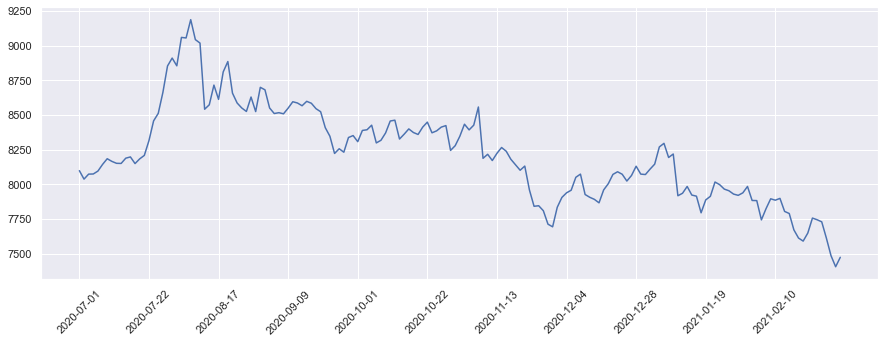

In [9]:
plt.figure(figsize = (15, 5))
plt.plot(selling)
plt.xticks(np.arange(len(timestamp))[::15], timestamp[::15], rotation = '45')
plt.show()

## Perfect!

So now let's we start our Data analytics.

#### Distribution study

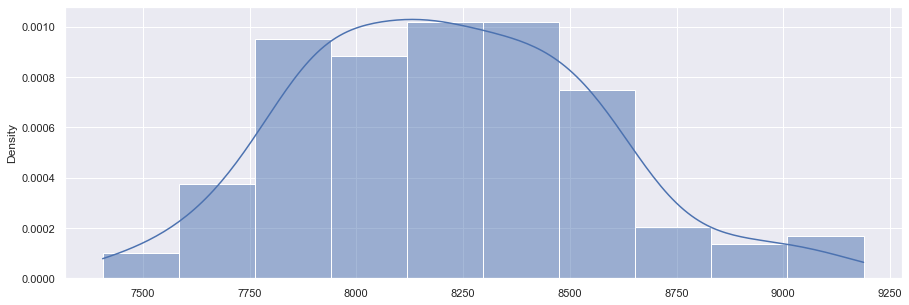

In [10]:
plt.figure(figsize = (15, 5))
sns.histplot(data=selling,stat='density', kde=True)
plt.show()

Look at this, already normal distribution, coincidence? (I really want to show off [unit scaling](https://en.wikipedia.org/wiki/Feature_scaling) skills!)

In case you are interested in [data normalization](https://towardsdatascience.com/all-kinds-of-cool-feature-scalers-537e54bc22ab), you have to understand scalars. The intention of a scaler is to lower the variance of the data in order to make most of the predictions lay in the area with the most data. There are many different scalers, which can boost your accuracy:

### Rescaler

Rescaling, or min-max normalization uses the minimum and maximum values to scale an array. 

$$x'=\frac{x-\min(x)}{\max(x)-\min(x)}$$

I haven’t really found it to be all that useful for machine-learning. I would say check it out only for the information and learning because this scalar typically throws estimations off and destroys accuracy in my experience. In one situation, I was able to use a rescaler as a min-max filter for bad data outputs on an endpoint. Though this certainly doesn’t cover the lost ground, I think that it was definitely a cool use for it. 

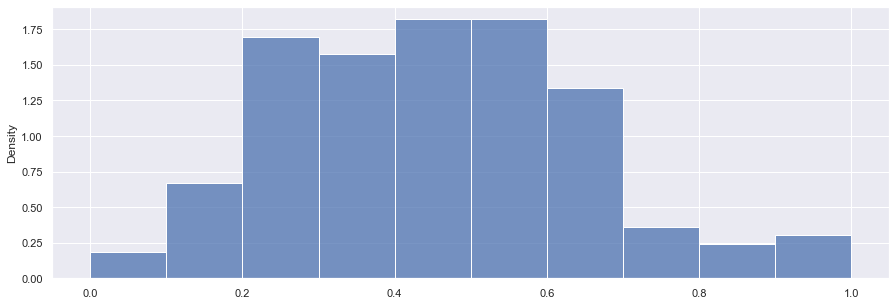

In [11]:
def rescaler(x):
    return (x-x.min())/(x.max()-x.min())
plt.figure(figsize = (15, 5))
sns.histplot(rescaler(np.array(selling)),stat='density')
plt.show()

### Mean Normalization

Mean Normalization is exactly what it sounds like, normalizing the data based on the mean. This one certainly could be useful, the only issue is that typically a z-score scalar does a lot better at normalizing the data than a mean normalizer. 

$$x'=\frac{x-mean(x)}{\max(x)-\min(x)}$$

I haven’t used this one particularly that much, just as typically it returns a lower accuracy score than a standard scaler.

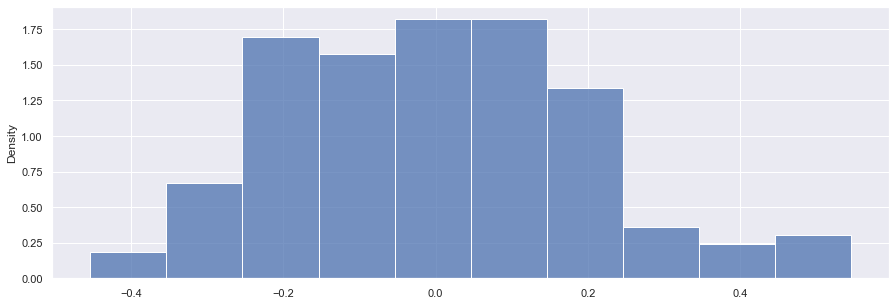

In [12]:
def mean_norm(x):
    return (x-x.mean())/(x.max()-x.min())
plt.figure(figsize = (15, 5))
sns.histplot(mean_norm(np.array(selling)),stat='density')
plt.show()

### Arbitrary Rescale

$$x'=\min(x)+\frac{(x-x\min(x))*(\max(x)-\min(x))}{\max(x)-\min(x)}$$

Arbitrary Rescale is particularly useful when you have a small quartile gap, meaning that the median isn’t far from the minimum or the maximum values. 

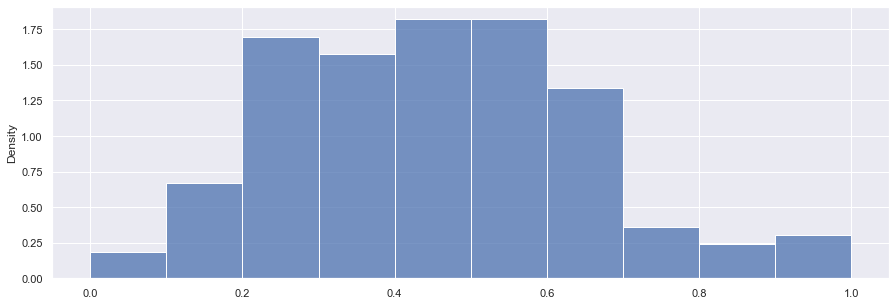

In [13]:
def arb_rescaler(x):
    min = x.min()
    max = x.max()
    return min+((x-x*min)*(x.max()-x.min()))/(x.max()-x.min())
plt.figure(figsize = (15, 5))
sns.histplot(rescaler(np.array(selling)),stat='density')
plt.show()

### Standard Scaler

A Standard Scaler, also known as z-score normalizer, is likely the best go-to for scaling continuous features. The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

$$x'=\frac{x-\hat{x}}{\sigma}$$

If you ever need an accuracy boost, this is the way to do it. I’ve used Standard Scalers a lot, probably everyday I use one at some point. For me, Standard Scaling has been the most useful out of all of the scalars, as it is for most people.

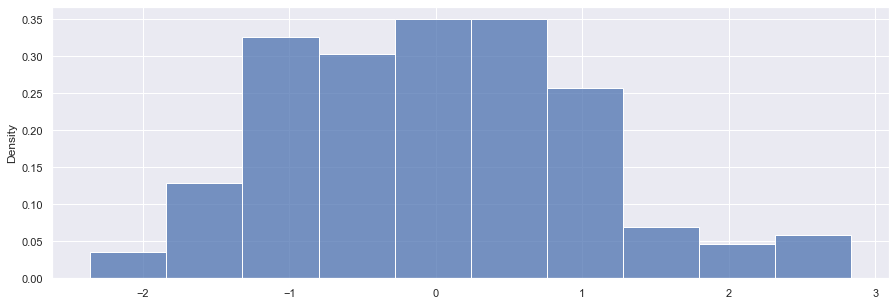

In [14]:
def standard_scaler(x):
    return (x-x.mean())/(x.std())
plt.figure(figsize = (15, 5))
sns.histplot(standard_scaler(np.array(selling)),stat='density')
plt.show()

### Unit Length Scalar

Another option we have on the machine-learning front is scaling to unit length. When scaling to vector unit length, we transform the components of a feature vector so that the transformed vector has a length of 1, or in other words, a norm of 1. 

$$x'=\frac{x}{||x||}$$

There are different ways to define “length” such as as l1 or l2-normalization. If you use l2-normalization, “unit norm” essentially means that if we squared each element in the vector, and summed them, it would equal 1. While in L1 normalization we normalize each element in the vector, so the absolute value of each element sums to 1.

Scaling to unit length can offer a similar result to z-score normalization, and I have certainly found it pretty useful. Unit Length Scalars use Euclidean distance on the denominator. Overall Unit Length Scaling can be very useful towards boosting your model’s accuracy.

So given a matrix X, where the rows represent samples and the columns represent features of the sample, you can apply l2-normalization to normalize each row to a unit norm. This can be done easily in Python using sklearn.

In [15]:
from sklearn import preprocessing

1.0


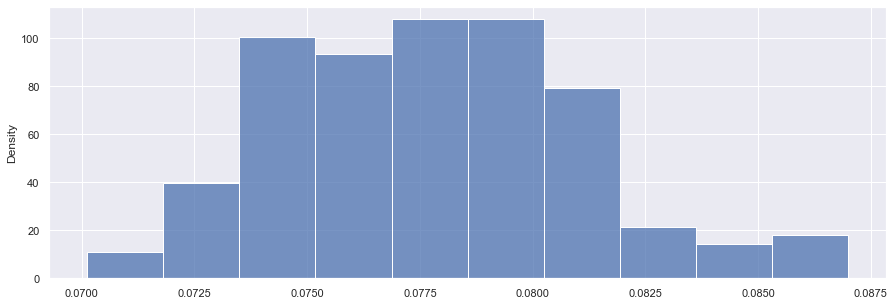

In [16]:
def unit_length_scaler_l2(x):
    return preprocessing.normalize(np.expand_dims(x, axis=0), norm='l2')[0]

print (np.sum(unit_length_scaler_l2(np.array(selling,dtype=np.float))**2, axis=0))
plt.figure(figsize = (15, 5))
sns.histplot(unit_length_scaler_l2(np.array(selling,dtype=np.float)),stat='density')
plt.show()

1.0


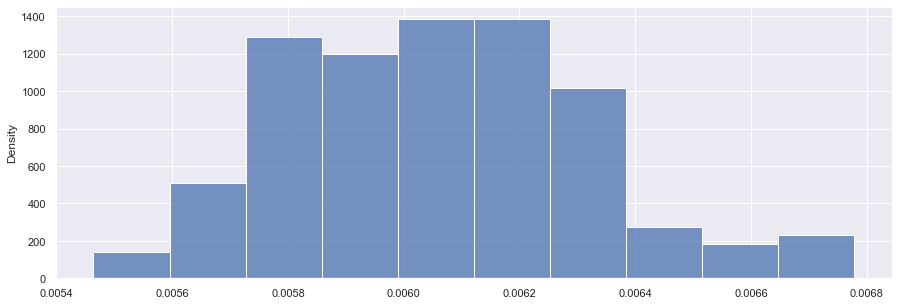

In [17]:
def unit_length_scaler_l1(x):
    return preprocessing.normalize(np.expand_dims(x, axis=0), norm='l1')[0]

print (np.sum(np.abs(unit_length_scaler_l1(np.array(selling,dtype=np.float))), axis=0))
plt.figure(figsize = (15, 5))
sns.histplot(unit_length_scaler_l1(np.array(selling,dtype=np.float)),stat='density')
plt.show()

Now let's change our into Pandas, for lagging analysis.

In [18]:
import pandas as pd
df = pd.DataFrame({'timestamp':timestamp, 'selling':selling})
df.head()

,timestamp,selling
0,2020-07-01,8099
1,2020-07-02,8038
2,2020-07-03,8074
3,2020-07-06,8075
4,2020-07-07,8096


In [19]:
def df_shift(df, lag = 0, start = 1, skip = 1, rejected_columns = []):
    df = df.copy()
    if not lag:
        return df
    cols = {}
    for i in range(start, lag + 1, skip):
        for x in list(df.columns):
            if x not in rejected_columns:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k, v in cols.items():
        columns = v
        dfn = pd.DataFrame(data = None, columns = columns, index = df.index)
        i = start - 1
        for c in columns:
            dfn[c] = df[k].shift(periods = i)
            i += skip
        df = pd.concat([df, dfn], axis = 1).reindex(df.index)
    return df

**Shifted and moving average are not same.**

In [20]:
df_crosscorrelated = df_shift(
    df, lag = 12, start = 4, skip = 2, rejected_columns = ['timestamp']
)
df_crosscorrelated['ma7'] = df_crosscorrelated['selling'].rolling(7).mean()
df_crosscorrelated['ma14'] = df_crosscorrelated['selling'].rolling(14).mean()
df_crosscorrelated['ma21'] = df_crosscorrelated['selling'].rolling(21).mean()

## why we lagged or shifted to certain units?

Virals took some time, impacts took some time, same goes to price lot / unit.

Now I want to `lag` for until 12 units, `start` at 4 units shifted, `skip` every 2 units.

In [21]:
df_crosscorrelated.head(21)

,timestamp,selling,selling_4,selling_6,selling_8,selling_10,selling_12,ma7,ma14,ma21
0,2020-07-01,8099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-07-02,8038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-07-03,8074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-07-06,8075,8099.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-07-07,8096,8038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-07-08,8144,8074.0,8099.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-07-09,8185,8075.0,8038.0,NaN,NaN,NaN,8101.571429,NaN,NaN
7,2020-07-10,8166,8096.0,8074.0,8099.0,NaN,NaN,8111.142857,NaN,NaN
8,2020-07-13,8152,8144.0,8075.0,8038.0,NaN,NaN,8127.428571,NaN,NaN
9,2020-07-14,8151,8185.0,8096.0,8074.0,8099.0,NaN,8138.428571,NaN,NaN


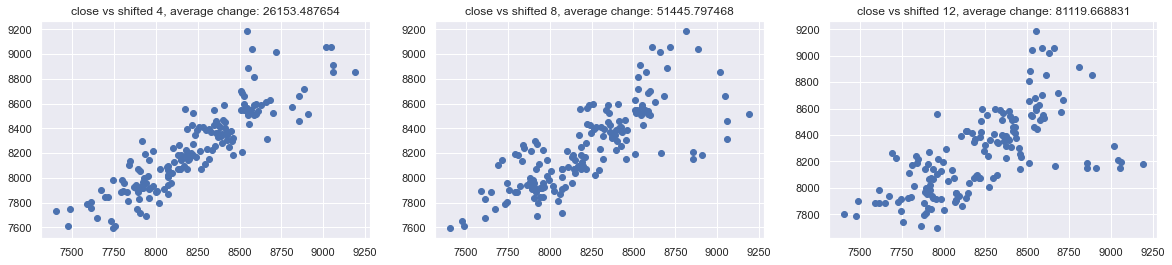

In [22]:
plt.figure(figsize = (20, 4))
plt.subplot(1, 3, 1)
plt.scatter(df_crosscorrelated['selling'], df_crosscorrelated['selling_4'])
mse = (
    (df_crosscorrelated['selling_4'] - df_crosscorrelated['selling']) ** 2
).mean()
plt.title('close vs shifted 4, average change: %f'%(mse))
plt.subplot(1, 3, 2)
plt.scatter(df_crosscorrelated['selling'], df_crosscorrelated['selling_8'])
mse = (
    (df_crosscorrelated['selling_8'] - df_crosscorrelated['selling']) ** 2
).mean()
plt.title('close vs shifted 8, average change: %f'%(mse))
plt.subplot(1, 3, 3)
plt.scatter(df_crosscorrelated['selling'], df_crosscorrelated['selling_12'])
mse = (
    (df_crosscorrelated['selling_12'] - df_crosscorrelated['selling']) ** 2
).mean()
plt.title('close vs shifted 12, average change: %f'%(mse))
plt.show()

MSE keeps increasing and increasing!

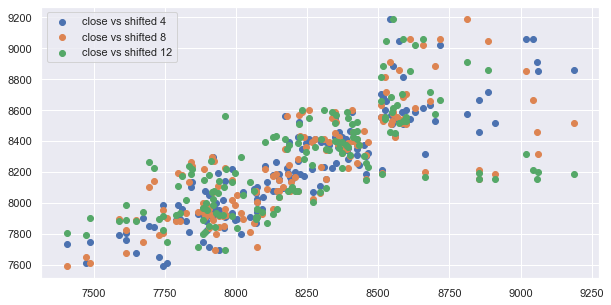

In [23]:
plt.figure(figsize = (10, 5))
plt.scatter(
    df_crosscorrelated['selling'],
    df_crosscorrelated['selling_4'],
    label = 'close vs shifted 4',
)
plt.scatter(
    df_crosscorrelated['selling'],
    df_crosscorrelated['selling_8'],
    label = 'close vs shifted 8',
)
plt.scatter(
    df_crosscorrelated['selling'],
    df_crosscorrelated['selling_12'],
    label = 'close vs shifted 12',
)
plt.legend()
plt.show()

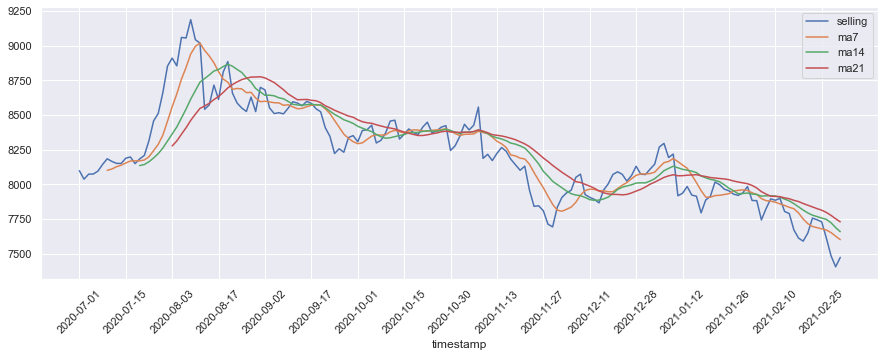

In [24]:
fig, ax = plt.subplots(figsize = (15, 5))
df_crosscorrelated.plot(
    x = 'timestamp', y = ['selling', 'ma7', 'ma14', 'ma21'], ax = ax
)
plt.xticks(np.arange(len(timestamp))[::10], timestamp[::10], rotation = '45')
plt.show()

As you can see, even moving average 7 already not followed sudden trending (blue line), means that, **dilation rate required less than 7 days! so fast!**

#### How about correlation?

We want to study linear relationship between, how many days required to give impact to future sold units?

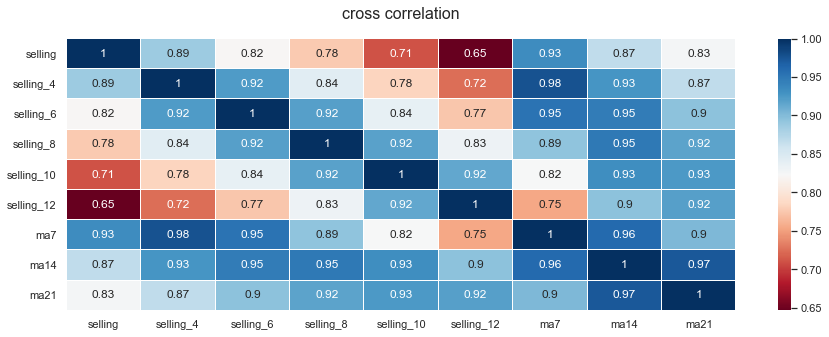

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize = (15, 5))
plt.title('cross correlation', y = 1.05, size = 16)

sns.heatmap(
    df_crosscorrelated.iloc[:, 1:].corr(),
    linewidths = 0.1,
    vmax = 1.0,
    cmap = colormap,
    linecolor = 'white',
    annot = True,
)
plt.show()

Based on this correlation map, look at selling vs selling_X,

**selling_X from 4 to 12 is getting lower, means that, if today is 50 mean, next 4 days should increased by 0.95 * 50 mean, and continue.**

#### Outliers

Simple, we can use Z-score to detect outliers, which timestamps gave very uncertain high and low value.

In [26]:
std_selling = (selling - np.mean(selling)) / np.std(selling)

In [27]:
def detect(signal, treshold = 2.0):
    detected = []
    for i in range(len(signal)):
        if np.abs(signal[i]) > treshold:
            detected.append(i)
    return detected

Based on z-score table, 2.0 already positioned at 97.772% of the population.

https://d2jmvrsizmvf4x.cloudfront.net/6iEAaVSaT3aGP52HMzo3_z-score-02.png

In [28]:
outliers = detect(std_selling)

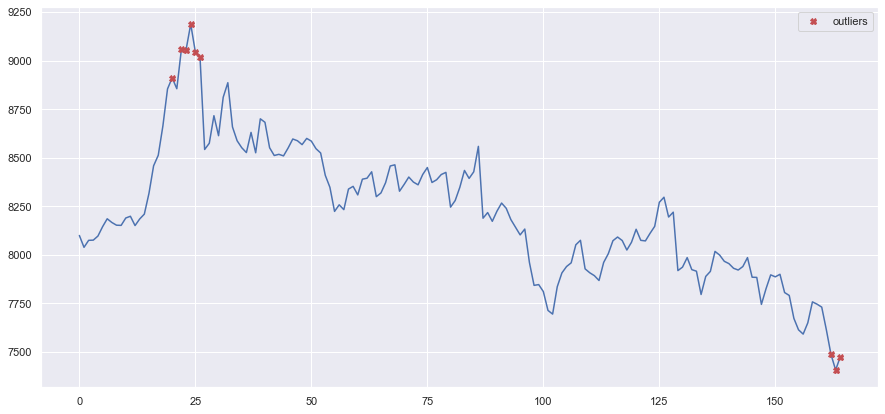

In [29]:
plt.figure(figsize = (15, 7))
plt.plot(selling)
plt.plot(
    np.arange(len(selling)),
    selling,
    'X',
    label = 'outliers',
    markevery = outliers,
    c = 'r',
)
plt.legend()
plt.show()

We can see that, **we have positive and negative outliers**. What happened to our local market on that days? So we should study sentiment from local news to do risk analysis.

# Give us predictive modelling!

Okay okay.

## Predictive modelling

Like I said, I want to compare with 3 models,

1. Linear regression
2. ARIMA
3. LSTM Tensorflow (sorry Pytorch, not used to it)

Which models give the best accuracy and lowest error rate?

**I want to split first timestamp 80% for train, another 20% timestamp for test.**

In [30]:
from sklearn.linear_model import LinearRegression

In [71]:
train_selling = selling[: int(0.8 * len(selling))]
test_selling = selling[int(0.8 * len(selling)) :]

Beware of `:`!

In [32]:
future_count = len(test_selling)
future_count

33

Our model should forecast 61 future days ahead.

#### Linear regression

In [33]:
%%time
linear_regression = LinearRegression().fit(
    np.arange(len(train_selling)).reshape((-1, 1)), train_selling
)
linear_future = linear_regression.predict(
    np.arange(len(train_selling) + future_count).reshape((-1, 1))
)

CPU times: user 958 µs, sys: 132 µs, total: 1.09 ms
Wall time: 1.47 ms


Took me 594 us to train linear regression from sklearn. Very quick!

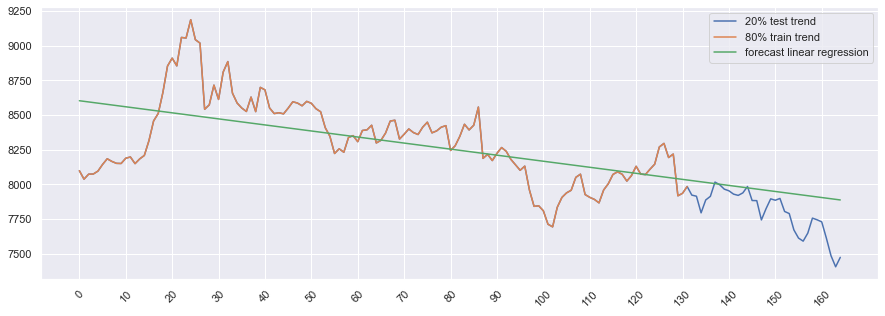

In [34]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(selling, label = '20% test trend')
ax.plot(train_selling, label = '80% train trend')
ax.plot(linear_future, label = 'forecast linear regression')
plt.xticks(
    np.arange(len(timestamp))[::10],
    np.arange(len(timestamp))[::10],
    rotation = '45',
)
plt.legend()
plt.show()

Oh no, if based on linear relationship, the trend is going down!

#### ARIMA

Stands for Auto-regressive Moving Average.

3 important parameters you need to know about ARIMA, ARIMA(p, d, q). You will able to see what is `p`, `d`, `q` from wikipedia, https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average.

`p` for the order (number of time lags).

`d` for degree of differencing.

`q` for the order of the moving-average.

Or,

`p` is how long the periods we need to look back.

`d` is the skip value during calculating future differences.

`q` is how many periods for moving average.

In [35]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from itertools import product

Qs = range(0, 2)
qs = range(0, 2)
Ps = range(0, 2)
ps = range(0, 2)
D = 1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)

Problem with ARIMA, you cannot feed a high value, so we need to scale, simplest we can use, minmax scaling.

In [36]:
minmax = MinMaxScaler().fit(np.array([train_selling]).T)
minmax_values = minmax.transform(np.array([train_selling]).T)

Now using naive meshgrid parameter searching, which pairs of parameters are the best! **Lower is better!**

In [87]:
best_aic = float('inf')
for param in parameters_list:
    try:
        model = sm.tsa.statespace.SARIMAX(
            minmax_values[:, 0],
            order = (param[0], D, param[1]),
            seasonal_order = (param[2], D, param[3], future_count),
        ).fit(disp = -1)
    except Exception as e:
        print(e)
        continue
    aic = model.aic
    print(aic)
    if aic < best_aic and aic:
        best_model = model
        best_aic = aic

print(best_model.specification)
print(best_model.model_orders)

arima_future = best_model.get_prediction(
    start = 0, end = len(train_selling) + (future_count - 1)
)
arima_future = minmax.inverse_transform(
    np.expand_dims(arima_future.predicted_mean, axis = 1)
)[:, 0]

-187.78616146295357
-205.19453188021407
-201.4875872721453
-203.26230458282146
-186.52583297253435
-203.27996049747335
-199.7816724112022
-201.3554609926802
-186.643146275856
-203.28294846406104
-199.800155252524
-201.3573909358683
-184.90491807562725
-201.27461613963035
-197.8185181619375
-199.29909459860403
{'seasonal_periods': 33, 'measurement_error': False, 'time_varying_regression': False, 'simple_differencing': False, 'enforce_stationarity': True, 'enforce_invertibility': True, 'hamilton_representation': False, 'concentrate_scale': False, 'trend_offset': 1, 'order': (0, 1, 0), 'seasonal_order': (0, 1, 1, 33), 'k_diff': 1, 'k_seasonal_diff': 1, 'k_ar': 0, 'k_ma': 0, 'k_seasonal_ar': 0, 'k_seasonal_ma': 33, 'k_ar_params': 0, 'k_ma_params': 0, 'trend': None, 'k_trend': 0, 'k_exog': 0, 'mle_regression': False, 'state_regression': False}
{'trend': 0, 'exog': 0, 'ar': 0, 'ma': 0, 'seasonal_ar': 0, 'seasonal_ma': 33, 'reduced_ar': 0, 'reduced_ma': 33, 'exog_variance': 0, 'measurement_va

### Auto-ARIMA 
https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

Usually, in the basic ARIMA model, we need to provide the p,d, and q values which are essential. We use statistical techniques to generate these values by performing the difference to eliminate the non-stationarity and plotting ACF and PACF graphs. In Auto ARIMA, the model itself will generate the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.

In [45]:
from pmdarima.arima import auto_arima

#### Test for Stationarity

Stationarity is an important concept in time-series and any time-series data should undergo a stationarity test before proceeding with a model.

We use the ‘Augmented Dickey-Fuller Test’ to check whether the data is stationary or not which is available in the ‘pmdarima’ package.

In [47]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(np.array(train_selling))

(0.21253437563118557, True)

From the above, we can conclude that the data is stationary. Hence, we would not need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series to make the data stationary while building the Auto ARIMA model.

#### Building Auto ARIMA model

In the Auto ARIMA model, note that small p,d,q values represent non-seasonal components, and capital P, D, Q represent seasonal components. It works similarly like hyper tuning techniques to find the optimal value of p, d, and q with different combinations and the final values would be determined with the lower AIC, BIC parameters taking into consideration.

Here, we are trying with the p, d, q values ranging from 0 to 5 to get better optimal values from the model. There are many other parameters in this model and to know more about the functionality, visit this link [here](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html)

In [50]:
auto_arima_model=auto_arima(train_selling, start_p=0, d=1, start_q=0, D=1, start_Q=0, max_P=5, max_d=5, max_Q=5, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)
auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1488.389, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.236, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1490.281, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1475.763, Time=0.16 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=1475.858, Time=0.41 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=1.14 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1477.721, Time=0.21 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1477.726, Time=0.24 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1477.381, Time=0.51 sec

Best model:  ARIMA(0,1,0)(2,1,0)[12]          
Total fit time: 4.956 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -734.881
Date:                            Wed, 03 Mar 2021   AIC                           1475.763
Time:                                    18:37:21   BIC                           1484.100
Sample:                                         0   HQIC                          1479.148
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7359      0.072    -10.219      0.000      -0.877      -0.595
ar.S.L24      -0.3846      0.082     -4.708      0.000      -0.545      -0.224
sigma2       1.27e+04   1236.022     10.276      0.000    1.03e+04    1.51e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                60.37
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -1.14
Prob(H) (two-sided):                  0.09   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In the basic ARIMA or SARIMA model, you need to perform differencing and plot ACF and PACF graphs to determine these values which are time-consuming.

However, it is always advisable to go with statistical techniques and implement the basic ARIMA model to understand the intuitive behind the p,d, and q values if you are new to time series.

#### Forecasting on the test data

Using the trained model which was built in the earlier step to forecast the sales on the test data.

In [88]:
auto_arima_future = train_selling
auto_arima_future.extend(auto_arima_model.predict(n_periods=len(test_selling)))

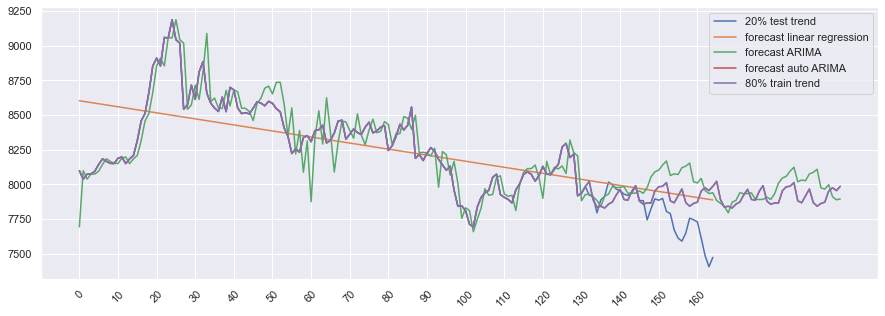

In [89]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(selling, label = '20% test trend')
ax.plot(linear_future, label = 'forecast linear regression')
ax.plot(arima_future, label = 'forecast ARIMA')
ax.plot(auto_arima_future, label = 'forecast auto ARIMA')
ax.plot(train_selling, label = '80% train trend')

plt.xticks(
    np.arange(len(timestamp))[::10],
    np.arange(len(timestamp))[::10],
    rotation = '45',
)
plt.legend()
plt.show()

Perfect!

Now we left,

#### RNN + LSTM

In [39]:
import tensorflow as tf

In [40]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)

        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * 2 * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )

**Naively defined neural network parameters, no meshgrid here. this parameters came from my dream, believe me :)**

In [41]:
num_layers = 1
size_layer = 128
epoch = 500
dropout_rate = 0.6
skip = 10

Same goes to LSTM, we need to scale our value becaused LSTM use sigmoid and tanh functions during feed-forward, we don't want any gradient vanishing during backpropagation.

In [42]:
df = pd.DataFrame({'values': train_selling})
minmax = MinMaxScaler().fit(df)
df_log = minmax.transform(df)
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.271084
1,0.230254
2,0.254351
3,0.255020
4,0.269076


In [43]:
tf.reset_default_graph()
modelnn = Model(
    learning_rate = 0.001, 
    num_layers = num_layers, 
    size = df_log.shape[1], 
    size_layer = size_layer, 
    output_size = df_log.shape[1], 
    forget_bias = dropout_rate
)
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

In [ ]:
%%time

for i in range(epoch):
    init_value = np.zeros((1, num_layers * 2 * size_layer))
    total_loss = 0
    for k in range(0, df_log.shape[0] - 1, skip):
        index = min(k + skip, df_log.shape[0] -1)
        batch_x = np.expand_dims(
            df_log.iloc[k : index, :].values, axis = 0
        )
        batch_y = df_log.iloc[k + 1 : index + 1, :].values
        last_state, _, loss = sess.run(
            [modelnn.last_state, modelnn.optimizer, modelnn.cost],
            feed_dict = {
                modelnn.X: batch_x,
                modelnn.Y: batch_y,
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        total_loss += loss
    total_loss /= ((df_log.shape[0] - 1) / skip)
    if (i + 1) % 100 == 0:
        print('epoch:', i + 1, 'avg loss:', total_loss)

In [ ]:
df = pd.DataFrame({'values': train_selling})
minmax = MinMaxScaler().fit(df)
df_log = minmax.transform(df)
df_log = pd.DataFrame(df_log)
future_day = future_count

output_predict = np.zeros((df_log.shape[0] + future_day, df_log.shape[1]))
output_predict[0] = df_log.iloc[0]
upper_b = (df_log.shape[0] // skip) * skip
init_value = np.zeros((1, num_layers * 2 * size_layer))
for k in range(0, (df_log.shape[0] // skip) * skip, skip):
    out_logits, last_state = sess.run(
        [modelnn.logits, modelnn.last_state],
        feed_dict = {
            modelnn.X: np.expand_dims(
                df_log.iloc[k : k + skip], axis = 0
            ),
            modelnn.hidden_layer: init_value,
        },
    )
    init_value = last_state
    output_predict[k + 1 : k + skip + 1] = out_logits

if upper_b < df_log.shape[0]:
    out_logits, last_state = sess.run(
        [modelnn.logits, modelnn.last_state],
        feed_dict = {
            modelnn.X: np.expand_dims(df_log.iloc[upper_b:], axis = 0),
            modelnn.hidden_layer: init_value,
        },
    )
    init_value = last_state
    output_predict[upper_b + 1 : df_log.shape[0] + 1] = out_logits
    df_log.loc[df_log.shape[0]] = out_logits[-1]
    future_day = future_day - 1
    
for i in range(future_day):
    out_logits, last_state = sess.run(
        [modelnn.logits, modelnn.last_state],
        feed_dict = {
            modelnn.X: np.expand_dims(df_log.iloc[-skip:], axis = 0),
            modelnn.hidden_layer: init_value,
        },
    )
    init_value = last_state
    output_predict[df_log.shape[0]] = out_logits[-1]
    df_log.loc[df_log.shape[0]] = out_logits[-1]

In [ ]:
df_log = minmax.inverse_transform(output_predict)
lstm_future = df_log[:,0]

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(selling, label = '20% test trend')
ax.plot(train_selling, label = '80% train trend')
ax.plot(linear_future, label = 'forecast linear regression')
ax.plot(arima_future, label = 'forecast ARIMA')
ax.plot(lstm_future, label='forecast lstm')
plt.xticks(
    np.arange(len(timestamp))[::10],
    np.arange(len(timestamp))[::10],
    rotation = '45',
)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr

Accuracy based on correlation coefficient, **higher is better!**

In [ ]:
def calculate_accuracy(real, predict):
    r2 = r2_score(real, predict)
    if r2 < 0:
        r2 = 0

    def change_percentage(val): 
    # minmax, we know that correlation is between -1 and 1
        if val > 0:
            return val
        else:
            return val + 1

    pearson = pearsonr(real, predict)[0]
    spearman = spearmanr(real, predict)[0]
    pearson = change_percentage(pearson)
    spearman = change_percentage(spearman)
    return {
        'r2': r2 * 100,
        'pearson': pearson * 100,
        'spearman': spearman * 100,
    }

Distance error for mse and rmse, **lower is better!**

In [ ]:
def calculate_distance(real, predict):
    mse = ((real - predict) ** 2).mean()
    rmse = np.sqrt(mse)
    return {'mse': mse, 'rmse': rmse}

#### Now let's check distance error using Mean Square Error and Root Mean Square Error

Validating based on 80% training timestamps

In [ ]:
linear_cut = linear_future[: len(train_selling)]
arima_cut = arima_future[: len(train_selling)]
lstm_cut = lstm_future[: len(train_selling)]

Linear regression

In [ ]:
calculate_distance(train_selling, linear_cut)

In [ ]:
calculate_accuracy(train_selling, linear_cut)

ARIMA

In [ ]:
calculate_distance(train_selling, arima_cut)

In [ ]:
calculate_accuracy(train_selling, arima_cut)

LSTM

In [ ]:
calculate_distance(train_selling, lstm_cut)

In [ ]:
calculate_accuracy(train_selling, lstm_cut)

**LSTM learn better during training session!**

How about another 20%?

In [ ]:
linear_cut = linear_future[len(train_selling) :]
arima_cut = arima_future[len(train_selling) :]
lstm_cut = lstm_future[len(train_selling) :]

Linear regression

In [ ]:
calculate_distance(test_selling, linear_cut)

In [ ]:
calculate_accuracy(test_selling, linear_cut)

ARIMA

In [ ]:
calculate_distance(test_selling, arima_cut)

In [ ]:
calculate_accuracy(test_selling, arima_cut)

LSTM

In [ ]:
calculate_distance(test_selling, lstm_cut)

In [ ]:
calculate_accuracy(test_selling, lstm_cut)

**LSTM is the best model based on testing!**

Deep learning won again!

I guess that's all for now, **again, do not use these models to buy any stocks or trends!**